In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read in csv
houses_data= pd.read_csv("train.csv")

#show info 
houses_data.info()

#describe data
houses_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\bcoll\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


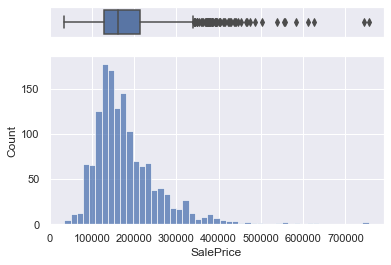

In [198]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(houses_data["SalePrice"], ax=ax_box)
sns.histplot(data=houses_data, x="SalePrice", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [199]:
max(houses_data["SalePrice"])

755000

<AxesSubplot:>

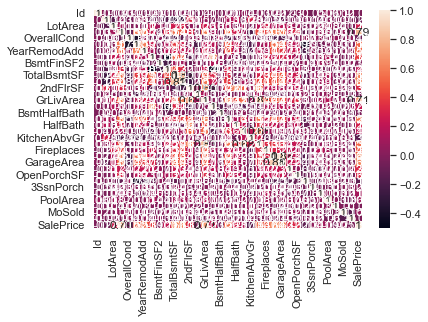

In [200]:
#create correlation heatmap

houses_int=houses_data.select_dtypes("int")

correlation_matrix = houses_int.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [201]:
#find percentage of missing data by variable

houses_missing= houses_data.isna()

houses_missing_sum=houses_missing.sum()

houses_misssing_percent=houses_missing_sum/len(houses_data)

houses_misssing_percent=houses_misssing_percent.sort_values(ascending=False).head(20)

print(sum(houses_missing_sum))


6965


<AxesSubplot:>

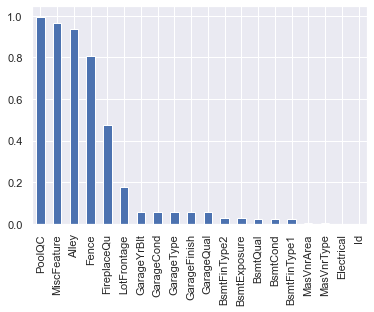

In [202]:
#plot top 20 missing variables
houses_misssing_percent.plot(kind='bar')

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'StoneBr'),
 Text(19, 0, 'ClearCr'),
 Text(20, 0, 'NPkVill'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

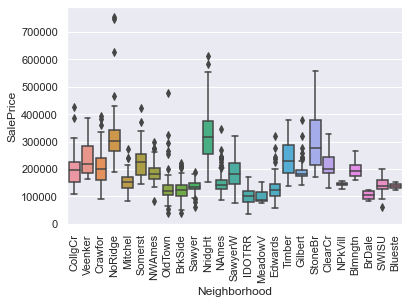

In [203]:
#boxplot of sale price by nieghborhood
chart=sns.boxplot(x="Neighborhood", y="SalePrice", data=houses_data);

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


[Text(0, 0, '1Fam'),
 Text(1, 0, '2fmCon'),
 Text(2, 0, 'Duplex'),
 Text(3, 0, 'TwnhsE'),
 Text(4, 0, 'Twnhs')]

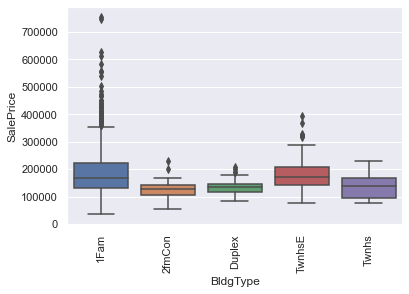

In [204]:

#boxplot of sale price by BldgType
chart=sns.boxplot(x="BldgType", y="SalePrice", data=houses_data);

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

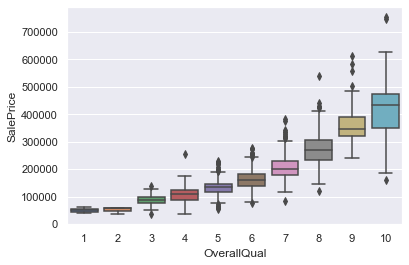

In [205]:
#boxplot of sale price by overall quality
sns.boxplot(x="OverallQual", y="SalePrice", data=houses_data);

In [206]:
 #pearson correlation coefficient between yearbuilt and sale price
from scipy.stats import pearsonr

pearsonr(houses_data["SalePrice"], houses_data["YearBuilt"])[0]

0.5228973328794969

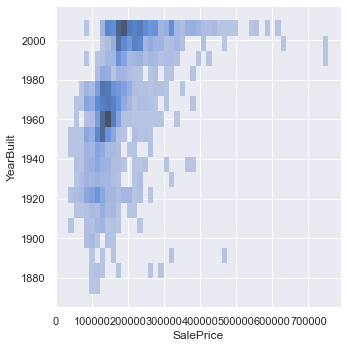

In [207]:
#displot sale price and yearbuilt
sns.displot(houses_data,x="SalePrice",y="YearBuilt")

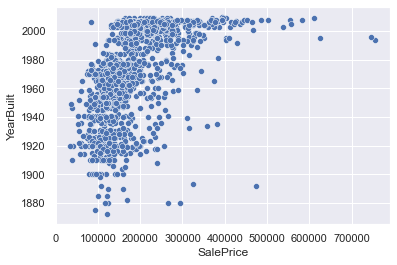

In [208]:
#scatterplot of sale price and yearbuilt
sns.scatterplot(x="SalePrice", y="YearBuilt", data=houses_data);

In [209]:
#pearson correlation coefficient between Saleprice and livable area
from scipy.stats import pearsonr

pearsonr(houses_data["SalePrice"], houses_data["GrLivArea"])[0]

0.7086244776126521

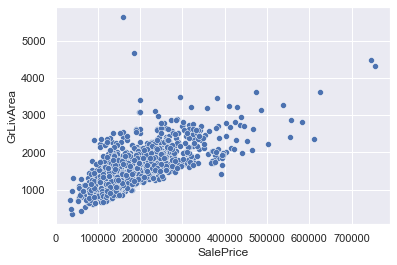

In [210]:
#Scatterplot of Saleprice and liveasble area
sns.scatterplot(x="SalePrice", y="GrLivArea", data=houses_data);

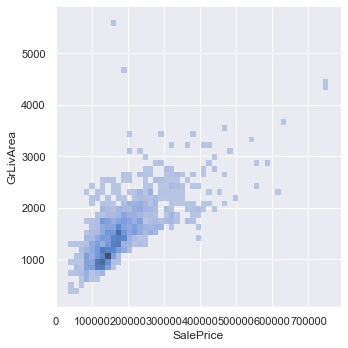

In [211]:
#displot sale price and liveable
sns.displot(houses_data,x="SalePrice",y="GrLivArea")

In [212]:
#dummy varialbes for categorial variables 

houses_data=pd.get_dummies(houses_data,columns=['Neighborhood','BldgType'])


In [213]:
#add liveable area per bedroom
houses_data=houses_data.assign(sqperbd = houses_data.GrLivArea/houses_data.BedroomAbvGr)

In [218]:
#add price per sqft
houses_data=houses_data.assign(pricepersf = houses_data.SalePrice/houses_data.GrLivArea)


0       121.929825
1       143.819334
2       125.139978
3        81.537566
4       113.739763
           ...    
1455    106.253795
1456    101.302460
1457    113.888889
1458    131.841373
1459    117.436306
Name: pricepersf, Length: 1460, dtype: float64

In [270]:
#scaling saleprice min max

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

houses_saleprice_minmax=houses_data.assign(SalePrice_minmax=scaler.fit_transform(houses_data[["SalePrice"]]))

houses_saleprice_minmax=houses_data.assign(SalePrice_minmax=scaler.fit_transform(houses_data[["pricepersf"]]))




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,sqperbd,pricepersf,SalePrice_minmax
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.026027,0.007534,0.835616,0.021233,0.035616,0.029452,0.078082,inf,120.572878,0.371993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.159271,0.086502,0.370750,0.144209,0.185395,0.169128,0.268393,NaN,31.391081,0.126632
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.800000,28.358738,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,424.156250,99.822008,0.288284
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,511.833333,120.099031,0.370081
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,621.916667,138.700041,0.445118
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,276.250881,1.000000


In [271]:
#scaling saleprice standard

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

houeses_saleprice_standard=houses_data.assign(SalePrice_standard=scaler.fit_transform(houses_data[["SalePrice"]]))

houeses_saleprice_standard=houses_data.assign(SalePrice_standard=scaler.fit_transform(houses_data[["price"]]))
